# MiniProyecto 2: Segmentación de higado en volumenes MRI

## Entrega 1: 

En el anterior miniproyecto empezamos a relacionarnos con las tareas de la visión por computador y la metodología de investigación, que va desde la visualización y el entendimiento del problema a resolver, pasando por la planeación de experimentos y el pre-procesamiento, para finalizar con el desarrollo de un algoritmo completo y su metodología de evaluación. En el anterior miniproyecto nos centramos en la detección, una tarea de clasificación binaria donde buscamos remarcar o delimitar un objeto en una ventana. Ahora, nos familiarizaremos con la tarea de segmentación, con la que ya pudimos experimentar en la entrega pasada, pero ahora siendo el problema principal y no un vehiculo para la detección. Debemos recordar que la segmentación es una refinación de la tarea de clasificación, donde queremos asignarle a cada pixel una etiqueta, en este caso será una clasificación binaria donde la clase 0 es el fondo y la clase 1 será el higado. 

### Parte 1: Exploración de base de datos

Como aprendimos anteriormente, lo primero que debemos hacer es familiarizarnos con las imágenes de la base de datos. En esta ocasión no tenemos imagenes como tal sino volumenes ya que tratamos con imagenes medicas, en concreto, MRI.

#### Parte 1.1: Importación de imagenes y anotaciones

Para poder abrir los archivos de MRI debemos usar la libreria **nibabel**. Use la siguiente celda para cargar el volumen original.nii y la segmentación segmentation.nii de la carpeta E1. 

> - **Nota** Para poder abrir los volumenes debe usar la función *load* y la función *get_fdata*. Puede ver un ejemplo en este link https://nipy.org/nibabel/gettingstarted.html. 

In [1]:
#!pip install nibabel

In [2]:
from glob import glob
import os
import nibabel as nib
import numpy as np

original_vol='' # Volumen original original.nii
seg_vol='' #Volumen de segmentación segmentation.nii

# YOUR CODE HERE
path_original=glob(os.path.join(".","E1","original.nii"))[0]
path_seg=glob(os.path.join(".","E1","segmentation.nii"))[0]
original_vol=nib.load(path_original).get_fdata()
seg_vol=nib.load(path_seg).get_fdata()

In [3]:
assert np.isclose(np.sum(original_vol),5004343,0.01), f'El volumen original.nii no es correcto'
assert np.isclose(np.sum(seg_vol),555218,0.01), f'El volumen de segmentación no es el correcto'

#### Parte 1.2 Distribución de la imagen y segmentación
Ahora vamos a explorar la distribución de las clases en la segmentación. Al igual que en los problemas de detección, tendremos una distribución de etiquetas dentro de cada dato, recuerden que nuestros datos son volumenes. Use la siguiente celda para encontrar la cantidad de pixeles de cada clase en la volumen original. Tambien saque los porcentajes de estas clases. Todo el dataset tiene 3 labels y cada label es un numero, tengalo en cuenta.

> **Recomendación:** Use np.unique (busque la documentación) para encontrar los labels de las segmentaciones, sabemos que son numeros pero no que numeros son.

In [4]:
labels='' #arreglo con las etiquetas de la base de datos de train

# YOUR CODE HERE
labels = np.unique(seg_vol)

In [5]:
assert labels.shape[0] == 3, f'El número de etiquetas debería ser 3'
assert np.isclose(np.sum(labels), 3, 0.1), f'Obtuvieron los labels incorrectamente'

In [6]:
label_0='' #cantidad de voxeles con la etiqueta 0
label_1='' #cantidad de voxeles con la etiqueta 1
label_2='' #cantidad de voxeles con la etiqueta 2

# YOUR CODE HERE
label_0=np.sum(seg_vol==labels[0])
label_1=np.sum(seg_vol==labels[1])
label_2=np.sum(seg_vol==labels[2])

In [7]:
print ("{:<15} {:<20}".format('Clase','Total voxeles por clase'))
print ('----------------------------------------------------------------------------')
print ("{:<15} {:<20}".format(labels[0],label_0))
print ("{:<15} {:<20}".format(labels[1],label_1))
print ("{:<15} {:<20}".format(labels[2],label_2))

Clase           Total voxeles por clase
----------------------------------------------------------------------------
0.0             19108173            
1.0             550036              
2.0             2591                


In [8]:
assert np.isclose(np.sum(label_0), 19108173, 0.01), f'El número de píxeles en la clase 0 debería ser 19108173 y no {np.sum(label_0)}'
assert np.isclose(np.sum(label_1), 550036, 0.01), f'El número de píxeles en la clase 1 debería ser 19108173 y no {np.sum(label_1)}'
assert np.isclose(np.sum(label_1), 550036, 0.01), f'El número de píxeles en la clase 1 debería ser 19108173 y no {np.sum(label_1)}'

#### Parte 1.3: Visualización de anotaciones
Veamos ahora los datos con los que vamos a trabajar. Sabemos que nuestros datos originales son MRI, son volumenes, pero aun no sabemos como serán nuestras anotaciones. Esto es importante porque, como todo problema de vision por computador, debemos saber cuales son nuestros inputs y cuales queremos que sean nuestros outputs. En la siguiente celda use el volumen original.nii y busque cual es el slice de la anotación (volumen segmentado) que más area de segmentación tiene en el eje axial. Haga un plot de del corte y de la segmentacion más grande. 

> **Recuerde:** Tenemos el label del fondo (0) y las demas labels, pero nosotros solo queremos tratar con una segmentación binaria. De ahora en adelante, las labels que son diferentes de 0 serán 1.

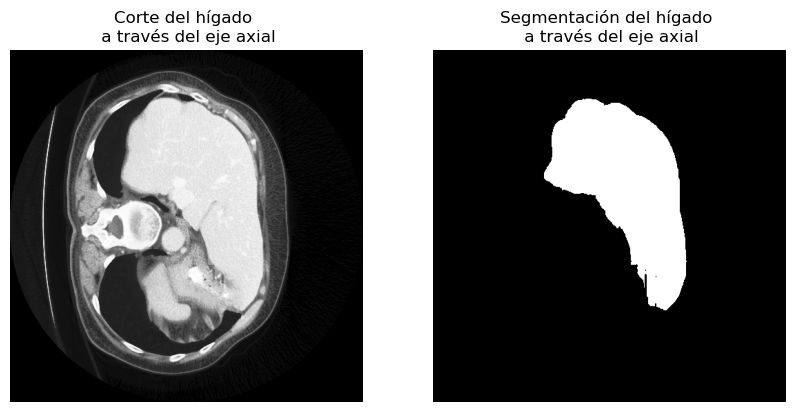

In [9]:
import matplotlib.pyplot as plt

slice_axial='' #Slice con mayor area de higado en el eje axial
area_axial='' #Mayor area de higado en eje axial
# YOUR CODE HERE
seg_vol[seg_vol == 2] = 1
area_axial = 0

for i in range(seg_vol.shape[2]):
    slice_i = seg_vol[:,:,i]
    if np.sum(slice_i) > area_axial:
        area_axial = np.sum(slice_i)
        slice_axial = i
        
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title("Corte del hígado \n a través del eje axial")
plt.imshow(original_vol[:,:,slice_axial], cmap='gray')
plt.axis('Off')
plt.subplot(122)
plt.title("Segmentación del hígado \n a través del eje axial")
plt.imshow(seg_vol[:,:,slice_axial], cmap='gray')
plt.axis('Off')
plt.show()

In [10]:
assert len(np.unique(seg_vol))==2, f'Las etiquetas del volumen de anotacion deben ser 2 y son {len(np.unique(segmen1))}, puede que haya guardado el volumen 1 en esta variable o no haya contado la etiqueta 1 y 2 como 1.'
assert np.isclose(slice_axial,65,0.01), 'El eje mayor no es el encontrado. El eje axial es la ultima coordenada, la transversal es la segunda y la sagital es la primera'
assert np.isclose(np.sum(seg_vol[:,:,slice_axial]>0)-area_axial,0), 'El area del higado guardado en la variable no es igual al slice de maxima area determinada'

### Parte 2: Anotación
El problema que queremos tratar es el de la segmentación del higado. La segmentación que realizaremos se basará directamente en las intensidades de nuestra imagen. Un punto a destacar es la diferencia que tenemos con la anterior base de datos, ahora no contamos con imagenes a color y muchos tegidos tendrán una intensidad similar a la de nuestro organo de interes.

#### Parte 2.1: Histograma
Usted cuenta con volumenes de anotación, si visualizó con cuidado sus anotaciones sabrá que son volumenes de etiquetas (0,1,2 aunque consideramos el 2 y el 1 como una misma etiqueta) Utilice este volumen de anotación para extraer el higado con sus intensidades originales. Posteriormente, realice un plot mostrando el organo y su histograma (no nos importan las intensidades de 0 porque son el fondo). Utilice el volumen original.nii y la segmentación segmentation.nii de la carpeta E1. Debe hacer el histograma para todo el higado, no solo una slice.

> - **Pista:** Si su volumen de segmentación tiene valores de 0 o 1, si se multiplica cualquier valor por 0, este desaparecerá, y todo aquel voxel que pertenezca a la segmentación será multiplicado por 1 y conservará su intensidad original. Haga el histograma sin tener en cuenta el fondo.

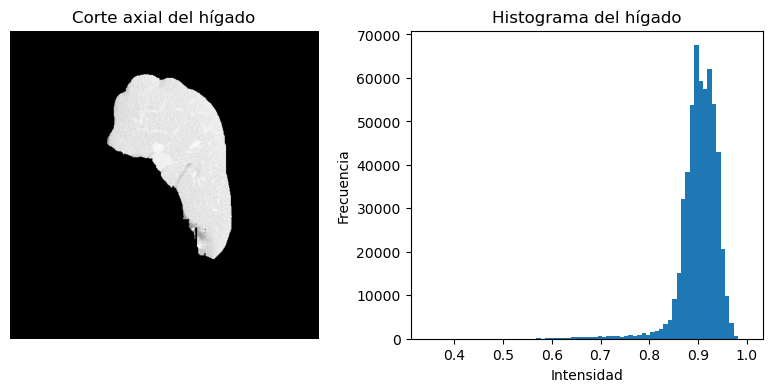

In [11]:
# Higado='' #volumen que contendrá solo el higado de la MRI
# YOUR CODE HERE
Higado = seg_vol * original_vol

# Graficamos el corte axial del higado  
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Corte axial del hígado")
plt.imshow(Higado[:,:,slice_axial], cmap='gray')
plt.axis('Off')

# Generamos  el histograma ignorando los valores distintos a 0
Higado_values = Higado[Higado != 0].flatten()
plt.subplot(122)
plt.hist(Higado_values, bins=73)
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.title('Histograma del hígado')
plt.show()

In [12]:
assert np.max(Higado)<=1.1, 'Seguramente su segmentación tiene la etiqueta 2'
assert np.isclose(np.mean(Higado),0.025,0.1), f'El valor medio del organo es {np.mean(Higado)} y no deberia ser este, quizá esta normalizando o no está tomando todo el organo'

#### Parte 2.2: Ruido
Un punto importante antes de realizar nuestro modelo de segmentación es el estado de las imagenes. Como utilizaremos las intesidades para realizar nuestra segmentación debemos asegurarnos que no tenemos ruido que afecte nuestras intensidades originales. 

Cargue los volumenes corruptos que se encuentran en la carpeta E1/corrupted_volumes y haga el mismo procedimeinto anterior. Haga un plot del higado segmentado corrupto y su respectivo histograma.

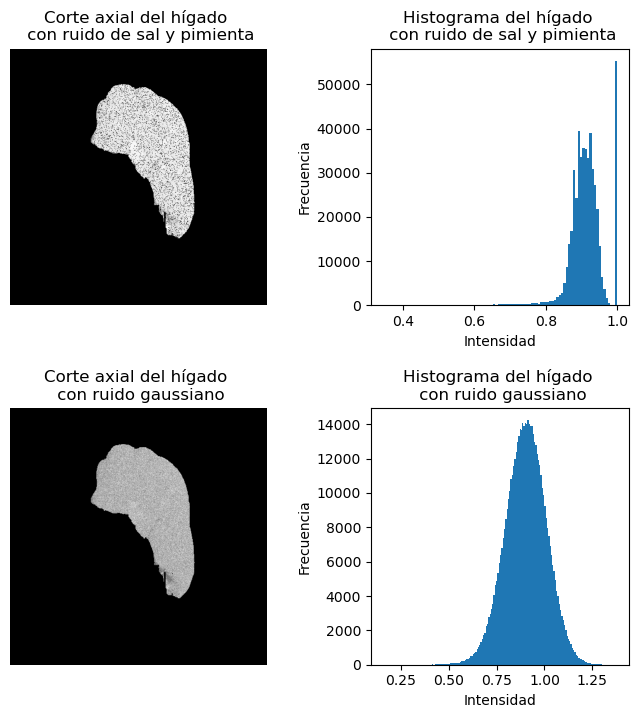

In [13]:
salt_peper='' #volumen con ruido de sal y pimienta
gaussian='' #volumen con ruido gaussiano
Higado_salt_peper='' #volumen que contendrá solo el higado de la MRI con ruido sal y pimienta
Higado_gaussian='' #volumen que contendrá solo el higado de la MRI con ruido gaussiano

# YOUR CODE HERE
salt_peper=nib.load(glob(os.path.join(".","E1","corrupted_volumes","salt_pepper_noised.nii"))[0]).get_fdata()
gaussian=nib.load(glob(os.path.join(".","E1","corrupted_volumes","gaussian_noised.nii"))[0]).get_fdata()

Higado_salt_peper = seg_vol*salt_peper
Higado_gaussian = seg_vol*gaussian

# Graficamos  
plt.figure(figsize=(8, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(221)
plt.title("Corte axial del hígado \n con ruido de sal y pimienta")
plt.imshow(Higado_salt_peper[:,:,slice_axial], cmap='gray')
plt.axis('Off')

Higado_values_salt_pepper = Higado_salt_peper[Higado_salt_peper != 0].flatten()
plt.subplot(222)
plt.hist(Higado_values_salt_pepper, bins=100)
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.title('Histograma del hígado \n con ruido de sal y pimienta')
                             
plt.subplot(223)
plt.title("Corte axial del hígado \n con ruido gaussiano")
plt.imshow(Higado_gaussian[:,:,slice_axial], cmap='gray')
plt.axis('Off')

Higado_values_gaussian = Higado_gaussian[Higado_gaussian != 0].flatten()
plt.subplot(224)
plt.hist(Higado_values_gaussian, bins=180)
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.title('Histograma del hígado \n con ruido gaussiano')

plt.show()

In [14]:
assert np.max(Higado_salt_peper)<=1.1, 'Seguramente su segmentación tiene la etiqueta 2'
assert np.isclose(np.sum(Higado_salt_peper!=0),497413,0.01), 'El volumen total del higado es incorrecto, no lo esta tomando todo'
assert np.isclose(np.mean(Higado_salt_peper),0.023,0.1), f'El valor medio del organo es {np.mean(Higado)} y no deberia ser este, quizá esta normalizando o no está tomando todo el organo'

assert np.max(Higado_gaussian)<=1.4, 'Seguramente su segmentación tiene la etiqueta 2'
assert np.isclose(np.sum(Higado_gaussian!=0),552627,0.01), 'El volumen total del higado es incorrecto, no lo esta tomando todo'
assert np.isclose(np.mean(Higado_gaussian),0.025,0.1), f'El valor medio del organo es {np.mean(Higado)} y no deberia ser este, quizá esta normalizando o no está tomando todo el organo'

### Parte 3: Remoción de ruido
Una parte importante a la hora de resolver problemas de vision por computador es el preprocesamiento. El ruido puede tener diversas fuentes y puede corromper la imagen de diferentes formas. Es nuestro trabajo manipular las imagenes de tal forma que sean más faciles de procesar por nuestro algoritmo de predicción. Es tambien muy importante hacer un diseño exhaustivo del procedimiento de filtrado que realizaremos, ya que no todos los filtros nos ayudaran a el procesamiento de las imagenes. Algunos filtros son muy especializados en el tipo de ruido que logrará filtrar, algunos filtros pueden magnificar el ruido o incluso dañar la imagen.

#### Parte 3.1: Filtrado lineal

Una primera idea puede ser el uso de la cross correlacion para el trabajo del filtrado. Use la función de scipy.signal.correlate y diseñe un filtro medio 3x3. Tambien use la función scipy.ndimage.gaussian_filter para hacer un filtro gaussiano y experimente con el sigma para obtener mejores resultados. Lea los dos volumenes de E1/corrupted_volumes, extraiga el slice axial encontrado en el punto 1 y use estos filtros, guarde los resultados en variables. Haga un subplot de 4 filas y 3 columnas, en las filas iran los diferentes ruidos con los diferentes filtros (ruido gaussiano con filtro medio, ruido gaussiano con filtro gaussiano, etc.) y en las columnas la imagen original (solo el higado), la imagen procesada y el histograma de la imagen procesada.

> - **Nota:** Procese las imagenes orignales y luego si extraiga unicamente el higado, no lo haga al reves. Use el parametro "same" para mantener el tamaño de la imagen original.

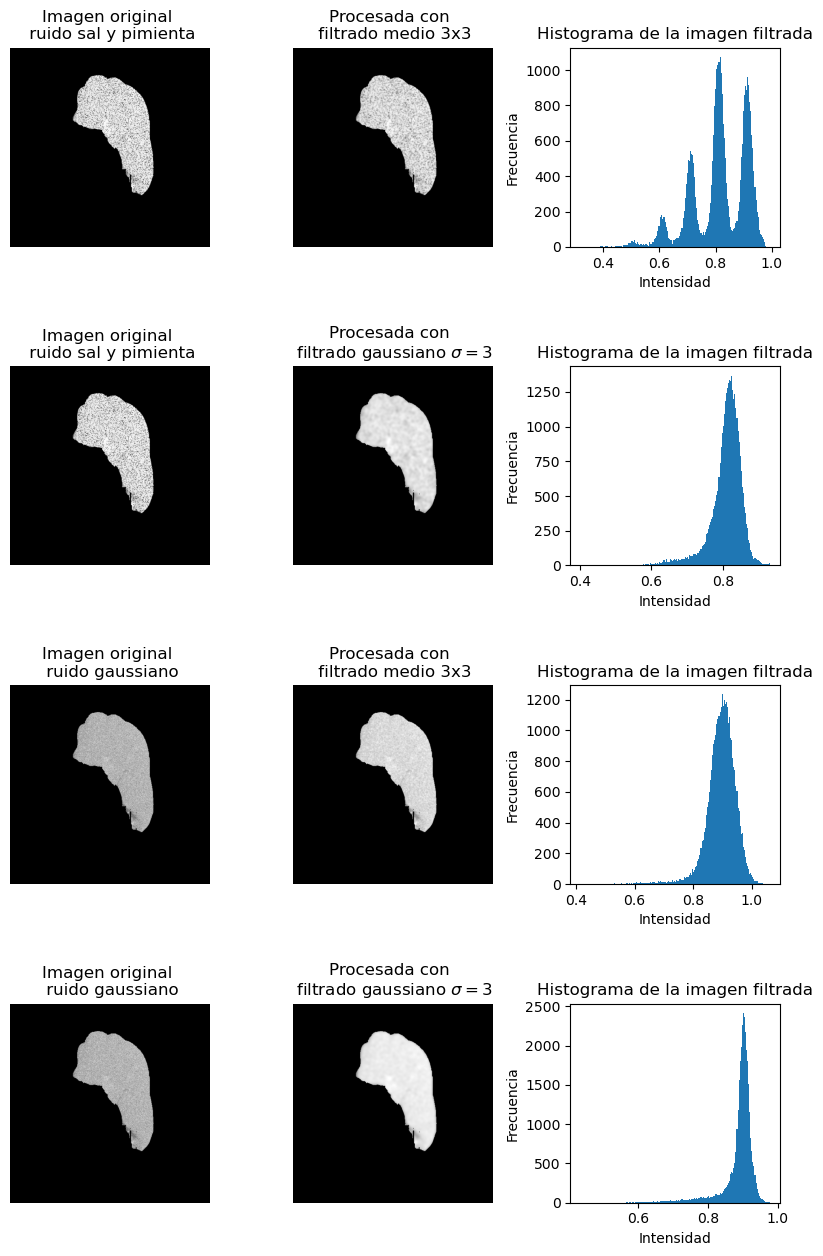

In [15]:
from scipy.signal import correlate
from scipy.ndimage import gaussian_filter

salt_peper_axial='' #slice del volumen con ruido sal y pimienta
gaussian_axial='' #slice del volumen con ruido gaussiano

media_filter='' #arreglo ndarray del filtro medio

media_salt_peper='' #slice de ruido sal y pimienta filtrado con filtro medio
gaussian_salt_peper='' #slice de ruido sal y pimienta filtrado con filtro gaussiano, sigma 3
media_gaussian='' #slice de ruido gaussiano filtrado con filtro medio
gaussian_gaussian='' #slice de ruido gaussiano filtrado con filtro gaussiano, sigma 3

gaussian_salt_peper_higado='' #slice de ruido sal y pimienta filtrado con filtro gaussiano solo del higado
gaussian_gaussian_higado='' #slice de ruido gaussiano filtrado con filtro gaussiano solo del higado
media_salt_peper_higado='' #slice de ruido sal y pimienta filtrado con filtro medio solo del higado
media_gaussian='' #slice de ruido gaussiano filtrado con filtro medio solo del higado

# YOUR CODE HERE
salt_peper_axial= salt_peper[:,:,slice_axial]
gaussian_axial= gaussian[:,:,slice_axial]

media_filter = (1/9)*np.ones((3,3))

media_salt_peper = correlate(salt_peper_axial, media_filter, mode='same')
gaussian_salt_peper = gaussian_filter(salt_peper_axial, sigma=3)
media_gaussian = correlate(gaussian_axial, media_filter, mode='same')
gaussian_gaussian = gaussian_filter(gaussian_axial, sigma=3)

gaussian_salt_peper_higado = gaussian_salt_peper * seg_vol[:,:,slice_axial]
gaussian_gaussian_higado = gaussian_gaussian  * seg_vol[:,:,slice_axial]
media_salt_peper_higado = media_salt_peper * seg_vol[:,:,slice_axial]
media_gaussian = media_gaussian * seg_vol[:,:,slice_axial]

# extraemos el higado
salt_peper_axial_higado = salt_peper_axial * seg_vol[:,:,slice_axial]
gaussian_axial_higado = gaussian_axial * seg_vol[:,:,slice_axial]
imagenes_ruido = [salt_peper_axial_higado, salt_peper_axial_higado, gaussian_axial_higado, gaussian_axial_higado]
imagenes_ruido_filtro = [media_salt_peper_higado, gaussian_salt_peper_higado, media_gaussian, gaussian_gaussian_higado]

# Graficamos
fig, ax = plt.subplots(4,3, figsize=(10,15))
plt.subplots_adjust(wspace=0.35, hspace=0.6)  

for i in range(4):
    if i<2:
        ax[i,0].set_title('Imagen original \n ruido sal y pimienta')
    else:
        ax[i,0].set_title('Imagen original \n ruido gaussiano')
    ax[i,0].imshow(imagenes_ruido[i], cmap='gray')
    ax[i,0].axis('Off')
    
    imagen_procesada = imagenes_ruido_filtro[i]
    ax[i,1].imshow(imagen_procesada, cmap='gray')
    ax[i,1].axis('Off')
    
    ax[i,2].set_title('Histograma de la imagen filtrada')    
    ax[i,2].hist(imagen_procesada[imagen_procesada!=0].flatten(), bins=180)
    ax[i,2].set_xlabel('Intensidad')
    ax[i,2].set_ylabel('Frecuencia')
ax[0,1].set_title('Procesada con \n filtrado medio 3x3')
ax[1,1].set_title('Procesada con \n filtrado gaussiano $\sigma=3$')
ax[2,1].set_title('Procesada con \n filtrado medio 3x3')
ax[3,1].set_title('Procesada con \n filtrado gaussiano $\sigma=3$')
plt.show()    

In [16]:
assert np.sum(media_filter)==1, 'La suma de todos los elementos del filtro deben sumar 1'
assert np.sum(media_filter==1/9)==9, 'Su filtro medio esta mal construido'
x,y=gaussian_salt_peper_higado.shape
x2,y2=salt_peper_axial.shape
assert x==x2 and y==y2, 'La imagen filtrada debe ser del mismo tamaño de la imagen original'

#### Parte 3.2: Filtrado no lineal
El filtrado lineal nos es muy util para obtener caracteristicas visuales de las imagenes y tambien para reducir cierto tipo de ruido. Sin embargo, pudieron observar cualitativamente las limitaciones de este tipo de filtrado. Una idea interesante puede ser el uso de filtrado no lineal para la eliminación de ruido y menor destrucción de la imagen original. Use los filtros maximo, minimo, mediano y mediano adaptativo para remover el ruido de las imagenes del anterior punto (puede usar la implementación del tutorial) haga una función que pueda hacer todos estos filtros segun se indique por parametro, tome en cuenta la condición de frontera como 0s. Haga un subplot de 2 filas 5 columnas, donde las filas son los diferentes ruidos y las columnas son la imagen original y los 4 tipos de filtros.

In [17]:
def No_linear_filter(Im,filter_type,window,max_window=3):
    '''
    :param Im: Imagen oringinal.
    :param filter_type: parametro que determina el tipo de filtrado a usar. 
                    Puede tomar de valores: 'min','max', 'median' or 'median_adapt'
    :param window: Tamaño de la ventana de analisis.
    :param max_window: Maximo tamaño de la ventana si se esta haciendo un filtro mediano adaptativo.
    '''

    # YOUR CODE HERE
    if filter_type == 'median_adapt':
        # realizar algoritmo según las diapositivas
        new_image = mediana_adaptativo(Im,window,max_window)
    else:
        new_image = estadistica_orden(Im, window, filter_type)
    
    return new_image

def estadistica_orden(f, w_size, filter_type):
    # Obtener m, n, a y b a partir de su definición
    m, n = w_size, w_size
    a, b = (m - 1)//2, (n - 1)//2

    if filter_type == 'min':
        filter_func = np.min
    elif filter_type == 'max':
        filter_func = np.max
    elif filter_type == 'median':
        filter_func = np.median
    
    # Crear una matriz correspondiente a f con un borde de ceros que permita obtener una matriz resultante
    # de la convolución de iguales dimensiones a f
    f_aug = np.block([[np.zeros((a, b)),           np.zeros((a, f.shape[1])),             np.zeros((a, b))],
                      [np.zeros((f.shape[0], b)),             f,                 np.zeros((f.shape[0], b))],
                      [np.zeros((a, b)),           np.zeros((a, f.shape[1])),             np.zeros((a, b))]])
    
    # Se crea un arreglo en el que se almacenarán los valores de g
    g = np.zeros(f.shape)
    
    # Para cada coordenada de g:
    for x in range(g.shape[0]):
        for y in range(g.shape[1]):
            # Trasladamos x y y a las coordenadas de f con borde
            x_aug = x + a
            y_aug = y + b
            
            # La ventana que se sobrelapa al filtro tiene coordenadas (x-a:x+a, y-b:y+b) en el sistema de coordenadas
            # de f con su borde. Se extrae esta ventana
            f_window = f_aug[x_aug - a:x_aug + a + 1, y_aug - b: y_aug + b + 1]
            
            # se aplica la funcion correspondiente para definir el valor
            g[x, y] = filter_func(f_window)
    
    # Se retorna la matriz resultante de la cross-correlación
    return g


def mediana_adaptativo(f, w_size_pred, max_window):
    
    # EDUARDO: Voy a colocar A y B para el caso de borde en el 
    # que se aumente la ventana al maximo en un pixel del borde
    M, N = max_window, max_window
    A, B = (M - 1)//2, (N - 1)//2
    
    # Crear una matriz correspondiente a f con un borde de ceros que permita obtener una matriz resultante
    # de la convolución de iguales dimensiones a f
    f_aug = np.block([[np.zeros((A, B)),           np.zeros((A, f.shape[1])),             np.zeros((A, B))],
                      [np.zeros((f.shape[0], B)),             f,                 np.zeros((f.shape[0], B))],
                      [np.zeros((A, B)),           np.zeros((A, f.shape[1])),             np.zeros((A, B))]])
    
    # Se crea un arreglo en el que se almacenarán los valores de g
    g = np.zeros(f.shape)
    
    # Para cada coordenada de g:
    for x in range(g.shape[0]):
        for y in range(g.shape[1]):

            # Trasladamos x y y a las coordenadas de f con borde
            x_aug = x + A
            y_aug = y + B
            
            # Iniciamos el tamaño de ventana predeterminado
            w_size_temp = w_size_pred
            
            assigned_value = False
            while not assigned_value:
                # ETAPA A:
                
                # Definimos la ventana actual
                m_temp, n_temp = w_size_temp, w_size_temp
                a_temp, b_temp = (m_temp - 1)//2, (n_temp - 1)//2
            
                # La ventana que se sobrelapa al filtro tiene coordenadas (x-a:x+a, y-b:y+b) en el sistema de coordenadas
                # de f con su borde. Se extrae esta ventana
                f_window = f_aug[x_aug - a_temp:x_aug + a_temp + 1, y_aug - b_temp: y_aug + b_temp + 1]

                A1 = np.median(f_window) - np.min(f_window)
                A2 = np.median(f_window) - np.max(f_window)

                if (A1>0) and (A2<0):
                    # ETAPA B:
                    B1 = f_aug[x_aug, y_aug] - np.min(f_window)
                    B2 = f_aug[x_aug, y_aug] - np.max(f_window)
                    if (B1>0) and (B2<0):
                        g[x,y] = f_aug[x_aug, y_aug] 
                        assigned_value = True
                    else:
                        g[x,y] = np.median(f_window)
                        assigned_value = True
                else:
                    w_size_temp += 2 # supongo que de a 2?
                    if  w_size_temp <= max_window:
                        pass # vuelve a hacer la etapa A
                    else:
                        g[x,y] = np.median(f_window)
                        assigned_value = True
        
    # Se retorna la matriz resultante 
    return g

In [18]:
Max_salt_peper=No_linear_filter(salt_peper_axial,'max',3)
Min_salt_peper=No_linear_filter(salt_peper_axial,'min',3)
Median_salt_peper=No_linear_filter(salt_peper_axial,'median',3)
MedianAdapt_salt_peper=No_linear_filter(salt_peper_axial,'median_adapt',3,11)

Max_gaussian=No_linear_filter(gaussian_axial,'max',3)
Min_gaussian=No_linear_filter(gaussian_axial,'min',3)
Median_gaussian=No_linear_filter(gaussian_axial,'median',3)
MedianAdapt_gaussian=No_linear_filter(gaussian_axial,'median_adapt',3,11)

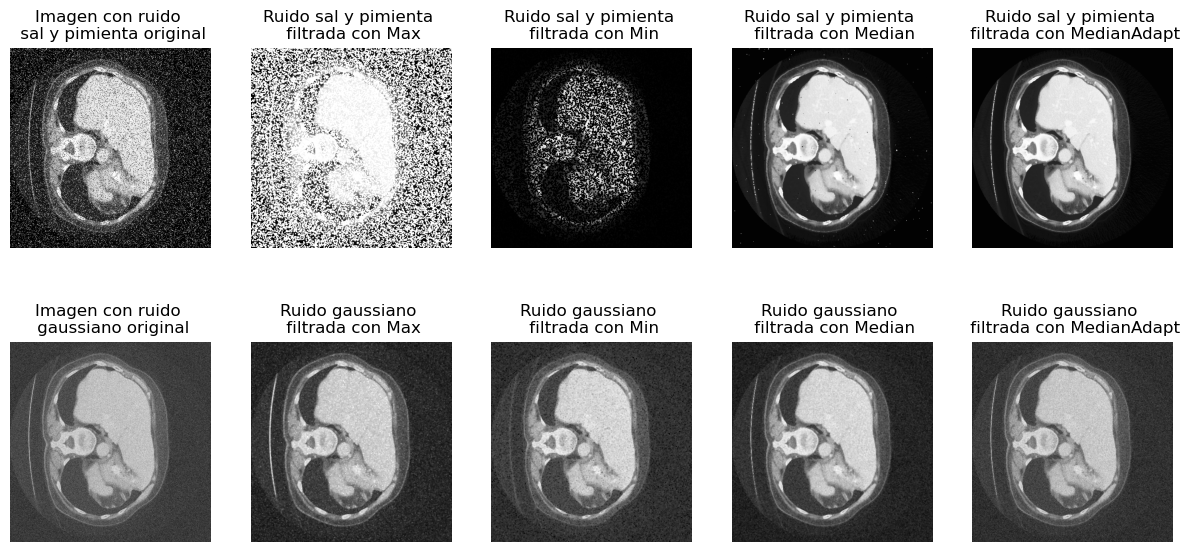

In [19]:
filtros_salt_peper = [salt_peper_axial, Max_salt_peper, Min_salt_peper, Median_salt_peper, MedianAdapt_salt_peper]
filtros_gaussian = [gaussian_axial, Max_gaussian, Min_gaussian, Median_gaussian, MedianAdapt_gaussian]
filtros_nombre = ['original','Max','Min','Median','MedianAdapt']

# Graficamos
fig, ax = plt.subplots(2,5, figsize=(15,7))

for j in range(5):
    ax[0,j].imshow(filtros_salt_peper[j], cmap='gray')
    ax[0,j].axis('Off')
    ax[1,j].imshow(filtros_gaussian[j], cmap='gray')
    ax[1,j].axis('Off')
    if j == 0:
        ax[0,j].set_title(f'Imagen con ruido \n sal y pimienta {filtros_nombre[j]}')
        ax[1,j].set_title(f'Imagen con ruido \n gaussiano {filtros_nombre[j]}')
    else:
        ax[0,j].set_title(f'Ruido sal y pimienta \n filtrada con {filtros_nombre[j]}')
        ax[1,j].set_title(f'Ruido gaussiano \n filtrada con {filtros_nombre[j]}')
        
plt.show()    

#### Parte 3.3 Evaluación cuantitativa

Hemos podido experimentar con los diferentes filtros que tenemos a nuestra disposición obteniendo resultados mejores o peores. La comparación que hemos podido tener es meramente cualitativa, sin embargo, contamos con una herramienta que nos permite saber que tan eficaz ha sido nuestro filtrado, el PSNR. Cree una función que entre como parametro 2 imagenes de un solo canal y retorne su PSNR. Considere el maximo de la imagen como 1.

In [20]:
original='' #slice del volumen original sin ruido
# YOUR CODE HERE
original = original_vol[:,:,slice_axial]

In [21]:
def PSNR(Im,Filtered):
    '''
    :param Im: Imagen oringinal.
    :param Filtered: Imagen filtrada.
    '''
    # YOUR CODE HERE
    # encontramos el MSE de la imagen filtrada
    mse = np.sum( (Im-Filtered)**2 ) / (Im.shape[0]*Im.shape[1])
    max_i = 1
    # calculamos el PSNR
    result = 20*np.log10(max_i) - 10*np.log10(mse)
    return result

In [22]:
Value_salt_peper_media=PSNR(original,media_salt_peper)
Value_salt_peper_gaussian=PSNR(original,gaussian_salt_peper)
Value_salt_peper_max=PSNR(original,Max_salt_peper)
Value_salt_peper_min=PSNR(original,Min_salt_peper)
Value_salt_peper_median=PSNR(original,Median_salt_peper)
Value_salt_peper_medianAdapt=PSNR(original,MedianAdapt_salt_peper)

Value_gaussian_media=PSNR(original,media_gaussian)
Value_gaussian_gaussian=PSNR(original,gaussian_gaussian)
Value_gaussian_max=PSNR(original,Max_gaussian)
Value_gaussian_min=PSNR(original,Min_gaussian)
Value_gaussian_median=PSNR(original,Median_gaussian)
Value_gaussian_medianAdapt=PSNR(original,MedianAdapt_gaussian)

In [23]:
arreglo=np.arange(0,9).reshape((3,3))
assert np.isclose(PSNR(arreglo,arreglo[::-1]),-13.80,0.1), f'Su función de PSNR no funciona como debería, el PSNR de esta muestra debería ser 34.32 y es {PSNR(arreglo,arreglo[::-1])}'
assert Value_salt_peper_median>Value_salt_peper_media, 'El filtro mediano en sal y pimienta no es el mejor filtro'
assert Value_gaussian_median>Value_gaussian_max, 'El filtro mediano en ruido gaussiano no es el mejor filtro'
assert Value_gaussian_median>Value_gaussian_medianAdapt, 'El filtro mediano en ruido gaussiano no es el mejor filtro'

assert np.isclose(Value_salt_peper_media,18.06,0.1), 'Filtro mal su volumen de sal y pimienta con el filtro medio'
assert np.isclose(Value_salt_peper_gaussian,19.76,0.1), 'Filtro mal su volumen de sal y pimienta con el filtro gaussiano'
assert np.isclose(Value_salt_peper_max,4.12,0.1), 'Filtro mal su volumen de sal y pimienta con el filtro maximo'
assert np.isclose(Value_salt_peper_median,27.94,0.1), 'Filtro mal su volumen de sal y pimienta con el filtro mediano'
assert np.isclose(Value_gaussian_median,26.61,0.1), 'Filtro mal su volumen gaussiano con el filtro mediano'
assert np.isclose(Value_salt_peper_medianAdapt,32.38,0.1), 'Filtro mal su volumen sal y pimienta con el filtro mediano adaptativo'

### Parte 4: Segmentación
Ahora, determinaremos cual será nuestro baseline este miniproyecto para segmentar el higado. Lo primero que debemos determinar será nuestra metodología de evaluación.

#### Parte 4.1: Jaccard 3D
Nuestra segmentación no es una imagen binaria, recuerde que estamos tratando con volumenes. En esta ocasión tendremos un volumen de segmentación. El cambio de output y de groundtruth requiere un cambio de métrica de evaluación, ya no podemos usar un Jaccard en 2D como siempre hemos hecho, tampoco podemos hacer un promedio de Jaccards en 2D. Implemente una función de Jaccard 3D que ingrese como parametro el volumen de predicción y el volumen de groundtruth y retorne el indice de Jaccard.

> **Recuerde:** La segmentación de groundtruth tiene 3 diferentes labels, usted quiere una segmentación binaria. Considere el label 1 y 2 como uno mismo.

Cree una función que retorne la precisión, la cobertura y la F-medida dado un volumen de predicción y uno de anotación. Tenga en cuenta los problemas con la división entre 0 (tome epsilon como 1x10^-6)

In [24]:
def Jaccard_3D(Im,Gt):
    '''
    :param Im: Volumen de prediccion.
    :param Gt: Segmentacion groundtruth.
    '''
    # YOUR CODE HERE
    inter = np.sum ( np.logical_and(Im, Gt) )
    union = np.sum( np.logical_or(Im, Gt) )
    J = inter / union
    return J

def P_C_F_3D(Im,Gt):
    '''
    :param Im: Volumen de prediccion.
    :param Gt: Segmentacion groundtruth.
    '''
    # YOUR CODE HERE
    epsilon = 1e-6
    TP = np.sum ( np.logical_and(Im, Gt) )
    FP = np.sum( np.logical_and(Im, np.logical_not(Gt)) )
    FN = np.sum( np.logical_and(Gt, np.logical_not(Im)) )
    Precision = TP / (TP+FP+epsilon)
    Recall = TP / (TP+FN+epsilon)
    Fscore = 2*Precision*Recall/(Precision+Recall+epsilon)
    return Precision,Recall,Fscore

In [25]:
assert np.isclose(Jaccard_3D(original_vol>0.8,seg_vol),0.35,0.01), 'El Jaccard 3D no da los resultados que debe, recuerde que no es lo mismo que un Jaccard 2D promediado'
P,C,F=P_C_F_3D(original_vol>0.8,seg_vol)
assert P<C, 'La precisión debe ser menor que la cobertura'
assert F<C and F>P, 'La F medida debe ser menor que la cobertura y mayor que la precisión'
assert np.isclose(F,0.52,0.1), 'La F medida esta mal calculada'

#### Parte 4.2: Elemento conexo
La metodología que utilizaremos para segmentar se basará en las intensidades, sin embargo, muchos tejidos tienen intensidades similares a nuestro organo de interes, lo que resulta en muchos falsos positivos. La idea será umbralizar nuestro volumen, posteriormente nos quedaremos con el componente conexo más grande. Cree una función que reciba como parametro una imagen 2D, la umbralice con un umbral que entre por parametro y retorne la mascara binaria con el elemento conexo mayor.

> - Para determinar el mayor elemento conexo, use skimage.measure.label. Esta función le dará una label a cada elemento conexo, es decir que cambiará su intensidad por un numero de 1 a N siendo N la cantidad de elementos conexos. Puede usar np.sum junto con algun operador logico para determinar el area de cada elemento conexo. La mayor label no necesariamente es el mayor elemento conexo. El fondo es el mayor elemento conexo, no lo tenga en cuenta!

In [26]:
from skimage.measure import label

def max_component(Im,umbral,operador):
    'Im (ndarray): Imagen a segmentar'
    'umbral (float): Umbral a utilizar'
    'operador (str): Puede ser "mayor" para > o "menor" para < segun se quiera umbralizar'
    # YOUR CODE HERE
    
    # Umbralizamos
    if operador == 'mayor':
        Im = Im > umbral
    elif operador == 'menor':
        Im = Im < umbral
    
    # encontramos el label del mayor componente
    labeled_img, n_labels = label(Im, return_num=True)
    label_mayor, label_count = 0, 0
    for label_i in range(1, n_labels+1):
        label_i_count = np.sum(labeled_img==label_i)
        if label_i_count > label_count:
            label_mayor = label_i
            label_count = label_i_count
    
    # encontramos el mayor componente
    max_comp = (labeled_img == label_mayor) * Im
    return max_comp

C:\Users\eduar\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


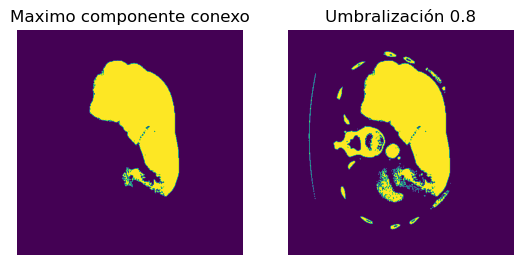

In [27]:
higado_umbral=original_vol[:,:,65]>0.8
higado_seg=max_component(original_vol[:,:,65],0.8,'mayor')
               
fig,ax=plt.subplots(1,2)
ax[1].imshow(higado_umbral)
ax[1].axis('off')
ax[0].set_title('Maximo componente conexo')
ax[0].imshow(higado_seg)
ax[0].axis('off')
ax[1].set_title('Umbralización 0.8')
plt.show()

assert np.sum((1-higado_umbral)*higado_seg)==0, 'Usted segmentó el fondo'
assert np.isclose(np.sum(higado_seg),34863,0.01), 'El elemento conexo segmentado no es el maximo'

Ahora, cree una función que entre como parametro un volumen completo y segmente slice por slice (recorrido axial) usando la función max_component realizada anteriormente. 

In [28]:
def Vol2D_max_component(Vol,umbral,operador):
    # YOUR CODE HERE
    segmentacion = np.zeros(Vol.shape)
    for i in range(Vol.shape[2]):
        segmentacion[:,:,i] = max_component(Vol[:,:,i], umbral, operador)
    return segmentacion

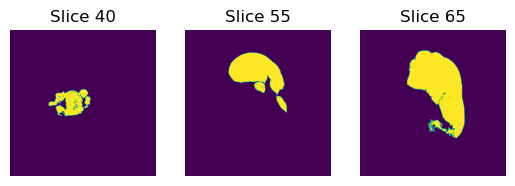

In [29]:
higado_seg_new=Vol2D_max_component(original_vol,0.8,'mayor')
               
fig,ax=plt.subplots(1,3)
ax[2].imshow(higado_seg_new[:,:,65])
ax[2].axis('off')
ax[2].set_title('Slice 65')
ax[0].imshow(higado_seg_new[:,:,40])
ax[0].axis('off')
ax[0].set_title('Slice 40')
ax[1].imshow(higado_seg_new[:,:,55])
ax[1].axis('off')
ax[1].set_title('Slice 55')
plt.show()

assert not np.sum(higado_seg_new[:,:,65]-higado_seg), 'La segmentacion del volumen en el slice 65 debe ser igual a la segmentación independiente del slice'
assert np.isclose(Jaccard_3D(higado_seg_new,seg_vol),0.62,0.05), 'La segmentación de todo el volumen fue erronea'

Utilizando esta metodología de segmentación, encuentre el mejor umbral para obtener la mejor segmentación posible. Pongalo en su reporte junto con algunos ejemplos buenos y malos de su implementación. Busque las partes donde el higado se segmenta bien y partes donde no se segmenta el higado.

In [30]:
print('Comprobamos que, como es evidente, usando umbrales con el operador \'<\' se encuentran muy malos resultados:')
for u in np.round(np.linspace(0.1, 0.9, 4),2): 
    seg_i = Vol2D_max_component(original_vol, u, 'menor')
    print(f'El umbral {u}  obtuvo un Jaccard de {round(Jaccard_3D(seg_i, seg_vol),3)}')
    
print('\nLos mejores resultados los encontramos en el rango 0.8-0.9 utilizando el operador \'>\':')
n_umbrales = 5
umbrales_range = np.round(np.linspace(0.8, 0.9, n_umbrales),2)
jaccards = np.zeros(n_umbrales)    
for i in range(len(umbrales_range)):
    umbral_i = umbrales_range[i]
    seg_i = Vol2D_max_component(original_vol, umbral_i, 'mayor')
    jaccards[i] = round(Jaccard_3D(seg_i, seg_vol),3)
    print(f'El umbral {umbral_i} obtuvo un Jaccard de {jaccards[i]}')
    
mejor_umbral = umbrales_range[np.argmax(jaccards)]
mejor_jaccard = jaccards[np.argmax(jaccards)]

print(f'\nEl mejor umbral fue {mejor_umbral}, el cual obtuvo un índice de Jaccard de {mejor_jaccard}.')

Comprobamos que, como es evidente, usando umbrales con el operador '<' se encuentran muy malos resultados:
El umbral 0.1  obtuvo un Jaccard de 0.0
El umbral 0.37  obtuvo un Jaccard de 0.0
El umbral 0.63  obtuvo un Jaccard de 0.0
El umbral 0.9  obtuvo un Jaccard de 0.009

Los mejores resultados los encontramos en el rango 0.8-0.9 utilizando el operador '>':
El umbral 0.8 obtuvo un Jaccard de 0.62
El umbral 0.82 obtuvo un Jaccard de 0.628
El umbral 0.85 obtuvo un Jaccard de 0.644
El umbral 0.88 obtuvo un Jaccard de 0.556
El umbral 0.9 obtuvo un Jaccard de 0.393

El mejor umbral fue 0.85, el cual obtuvo un índice de Jaccard de 0.644.


Por último, graficamos algunos resultados de la segmentación groundtruth, el mejor_umbral (0.85) y un umbral peor (0.4) para compararlos:


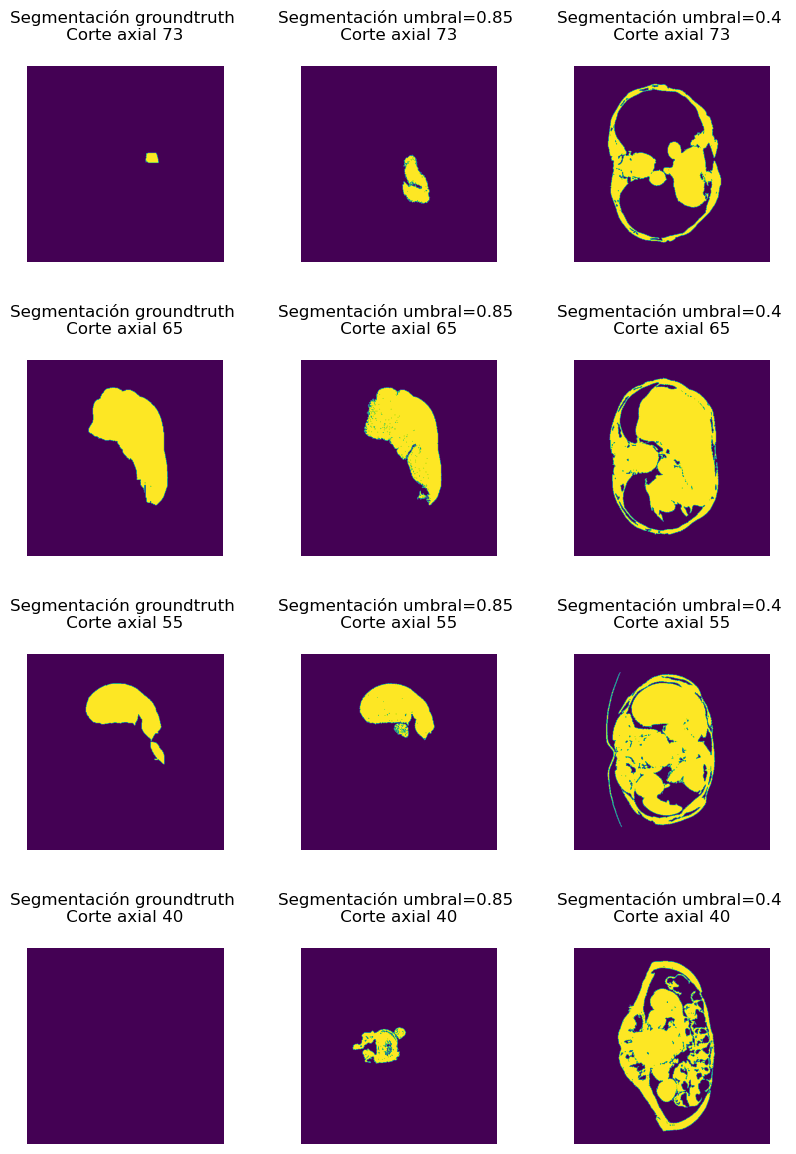

El mejor umbral se acerca a los resultados del groundtruth, aunque tiene muchos falsos positivos en los extremos del eje axial del hígado. Por su parte, la segmentación con un umbral peor da resultados muy imprecisos, considerando muchas estructuras incorrectamente.


In [31]:
print(f'Por último, graficamos algunos resultados de la segmentación groundtruth,'
      f' el mejor_umbral ({mejor_umbral}) y un umbral peor (0.4) para compararlos:')

mejor_seg = Vol2D_max_component(original_vol,mejor_umbral,'mayor')
peor_seg = Vol2D_max_component(original_vol,0.4,'mayor')

segs = [seg_vol, mejor_seg, peor_seg]
seg_nombres = ['Segmentación groundtruth', f'Segmentación umbral={mejor_umbral}', f'Segmentación umbral=0.4']
slices = [73,65,55,40]

fig,axs=plt.subplots(len(slices),3, figsize=(10,14))
plt.subplots_adjust(hspace=0.5)

for i in range(len(slices)):
    for j in range(3):
        axs[i,j].imshow(segs[j][:,:,slices[i]])
        axs[i,j].axis('off')
        axs[i,j].set_title(f'{seg_nombres[j]} \n Corte axial {slices[i]} \n')

        axs[i,j].imshow(segs[j][:,:,slices[i]])
        axs[i,j].axis('off')
        axs[i,j].set_title(f'{seg_nombres[j]} \n Corte axial {slices[i]} \n')

        axs[i,j].imshow(segs[j][:,:,slices[i]])
        axs[i,j].axis('off')
        axs[i,j].set_title(f'{seg_nombres[j]} \n Corte axial {slices[i]} \n')
plt.show()

print('El mejor umbral se acerca a los resultados del groundtruth, aunque tiene muchos falsos positivos '
      'en los extremos del eje axial del hígado. Por su parte, la segmentación con un umbral peor da '
      'resultados muy imprecisos, considerando muchas estructuras incorrectamente.')

### Parte 5: Visualización de errores
Antes de realizar cualquier pre-procesamiento es importante entender nuestras imagenes y las limitaciones de nuestro modelo para poder diseñar una metodología eficaz que mejore nuestros resultados y no nos resulte perjudicial. Tampoco nos funcionará realizar una metodología de pre-procesamiento a ciegas, siempre es importante comprender nuestro modelo y nuestras imagenes para no solo diseñar un metodo que nos funcione en una base de datos en especifico, sino que sea los mas generalizable posible. 


Cargue el volumen segmentation-1.nii y el volumen volume-1.nii de la base de datos de entrenamiento, luego utilice la función de umbralización creada en la entrega anterior para generar una predicción. Por ultimo, visualize las estructuras de el **volumen original** que usted esta segmentando con su algoritmo. Haga una función que cree 2 volumenes adicionales, uno que contenga unicamente los pixeles falsos positivos y otro que contenga unicamente los pixeles falsos negativos. Para el subplot encuentre en cada volumen los slices (axial, transversal y sagital) con mayor cantidad de errores.

> **Nota:** Recuerde que los FP serán aquellos pixeles que se encuentran en su prediccion pero no en su groundtruth. Los FN serán los pixeles que se encuentran en su groundtruth pero no en su predicción.

In [32]:
import nibabel as nib
from matplotlib import pyplot as plt
import numpy as np
import os
from skimage.exposure import equalize_hist,match_histograms
from skimage.filters import threshold_otsu as otsu
import cv2
from skimage.measure import label

volume1='' #volumen 1 de entrenamiento
segmen1='' #segmentacion del volumen 1 de entrenamiento, groundtruth
segment_pred='' #volumen de prediccion de su algoritmo
FN_volumes='' #volumen unicamente con pixeles Falsos Negativos
FP_volumes='' #volumen unicamente con pixeles Falsos Positivos

def errores(segment_pred,segmen1):
    'segment_pred (ndarray): volumen de predicción'
    'segmen1 (ndarray): volumen de groundtruth'
    # YOUR CODE HERE
    FP_volumes = np.logical_and(segment_pred, np.logical_not(segmen1))
    FN_volumes = np.logical_and(segmen1, np.logical_not(segment_pred))
    return FP_volumes,FN_volumes
    
# YOUR CODE HERE
volume1=nib.load(glob(os.path.join(".","E1","volume-1.nii"))[0]).get_fdata()
segmen1=nib.load(glob(os.path.join(".","E1","segmentation-1.nii"))[0]).get_fdata()
segment_pred=Vol2D_max_component(volume1,mejor_umbral,'mayor')
FP_volumes, FN_volumes = errores(segment_pred, segmen1)

In [33]:
aux_segment=Vol2D_max_component(volume1,0.8,'mayor')
fp,fn=errores(aux_segment,segmen1)
assert np.isclose(np.sum(fp),663620, 0.01), f'La cantidad de FP deberian ser 311520 y son {np.sum(fp)}'
assert np.isclose(np.sum(fn),33182, 0.01), f'La cantidad de FN deberian ser 16517 y son {np.sum(fn)}'

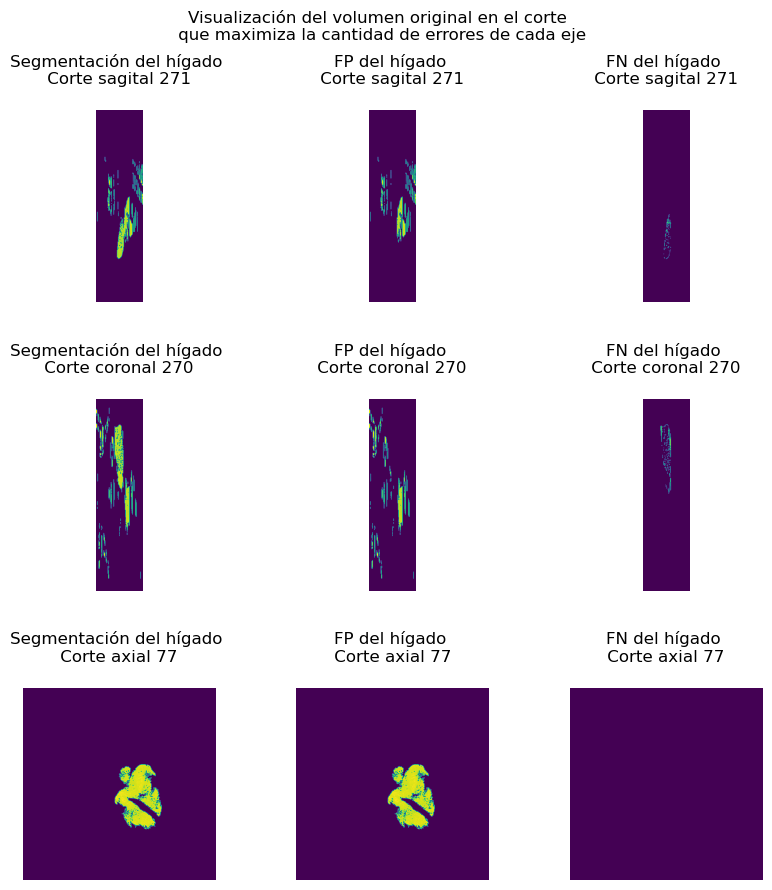

In [34]:
# YOUR CODE HERE
Higado1 = segment_pred * volume1
FP_higado1 = FP_volumes * volume1
FN_higado1 = FN_volumes * volume1

s_sag, s_cor, s_ax = 0, 0, 0
err_sag, err_cor, err_ax = 0, 0, 0

# encontramos el slice con más errores del eje sagital
for i in range(Higado1.shape[0]):
    err_slice_i =  np.sum(FP_volumes[i,:,:]) + np.sum(FN_volumes[i,:,:])
    if err_slice_i > err_sag:
        err_sag = err_slice_i
        s_sag = i

# encontramos el slice más errores del eje coronal
for j in range(Higado1.shape[1]):
    err_slice_j =  np.sum(FP_volumes[:,j,:]) + np.sum(FN_volumes[:,j,:])
    if err_slice_j > err_cor:
        err_cor = err_slice_j
        s_cor = j

# encontramos el slice más errores del eje axial
for k in range(Higado1.shape[2]):
    err_slice_k =  np.sum(FP_volumes[:,:,k]) + np.sum(FN_volumes[:,:,k])
    if err_slice_k > err_ax:
        err_ax = err_slice_k
        s_ax = k

slices = [s_sag, s_cor, s_ax]        
segs = [Higado1, FP_higado1, FN_higado1]
seg_nombres = ['Segmentación del hígado', 'FP del hígado', 'FN del hígado']


# Graficamos los cortes con mas errores del higado segmentado  
fig, axs = plt.subplots(3,3, figsize=(10,10))
fig.suptitle('Visualización del volumen original en el corte \n que maximiza la cantidad de errores de cada eje')
plt.subplots_adjust(hspace=0.5)

for j in range(3):
    axs[0,j].imshow(segs[j][s_sag,:,:])
    axs[0,j].axis('off')
    axs[0,j].set_title(f'{seg_nombres[j]} \n Corte sagital {s_sag} \n')

    axs[1,j].imshow(segs[j][:,s_cor,:])
    axs[1,j].axis('off')
    axs[1,j].set_title(f'{seg_nombres[j]} \n Corte coronal {s_cor} \n')
    
    axs[2,j].imshow(segs[j][:,:,s_ax])
    axs[2,j].axis('off')
    axs[2,j].set_title(f'{seg_nombres[j]} \n Corte axial {s_ax} \n')
plt.show()

## Informe:
En esta ocasión, no responderemos unicamente las preguntas sino que comenzaremos a familiarizarnos con la estructura de un informe de visión por computador. En este miniproyecto debe hacer un informe con Introducción, Resultados y Conclusiones respondiendo las preguntas en las secciones donde usted crea pertinente responderlas. 

### Exploración de base de datos:
Posteriormente, vamos a utilizar una base de datos que se compone de 3 volumes en train, 1 volumen en valid y 1 volumen en test. Basandonos en esto responda, dentro del informe, las siguientes preguntas:
* ¿Puede afirmar que este problema de segmentación es un problema desbalanceado? ¿Cómo puede afectar esto en nuestra metodología de segmentación?
* Teniendo en cuenta la cantidad de datos ¿Cree usted que un analisis pixel a pixel es eficiente para realizar una segmentación de todos nuestros datos?
* ¿Tiene sentido intentar balancear la base de datos?

### Anotación
* ¿Que particularidad observa entre los histogramas de los volumenes corruptos, el volumen filtrado y el volumen original?
* Teniendo en cuenta los histogramas, que umbrales escogeria en cada caso (volumen original y volumen corrupto) Justifique su respuesta y diga las posibles limitaciones.

### Remoción de ruido:
* ¿Que tipo de ruido es más comun en las imagenes medicas?
* ¿Cuales filtros dañaron más su imagen? ¿Por que sucede esto?
* ¿Cree usted que el filtrado gaussiano o filtro medio afectará su segmentación? Responda teniendo en cuenta nuestra metodología de segmentación y las caracteristicas del filtro.

### Segmentación:
* ¿Porque la metrica de Jaccard 3D no es igual que la de Jaccard 2D promediado? De una explicación matemática.
* Teniendo en cuenta las metricas de Jaccard 3D y la precisión y cobertura responda ¿Porque es necesario establecer una métrica de evaluación acorde a nuestro probelma principal? ¿Son estas 2 métricas compatibles? Conteste esta pregunta teniendo en cuenta el desbalance de datos.
* ¿Que organos o estructuras del cuerpo son problematicas para nuestra metodología de segmentación?

### Visualización de errores
* ¿Que estructuras en la MRI son las mas problematicas para nuestra segmentación?
* ¿Cómo se pueden mejorar los resultados obtenidos mediante una umbralización pura?

In [35]:
from utils import *

converter("Entrega 1")